# Milestones 1
Nama William

Batch : RMT-020

Link Dashboard : https://lookerstudio.google.com/reporting/845efb81-e796-4156-b833-3176d6138daa

# Introduction
## Problem Statement
Menganalisa  Ciri-ciri Peminjam dari data yang telah ada untuk digunakan sebagai Referensi di masa yang akan datang apakah Calon peminjam dapat diterima Pengaplikasian pinjaman nya


# Pre-Processing Data


In [2]:
# Import Library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Data Loading
# referensi data : https://www.kaggle.com/datasets/mirzahasnine/loan-data-set?select=loan_train.csv


df = pd.read_csv('loan_train.csv')
pd.set_option('display.precision',0)
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0,15000000,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800,12800000,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0,6600000,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800,12000000,360,1,Urban,Y
4,Male,No,0,Graduate,No,600000,0,14100000,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0,7100000,360,1,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0,4000000,180,1,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000,25300000,360,1,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0,18700000,360,1,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


Berdasarkan tipe data rata" semua yang ada sudah benar. hanya kolom credit history yang harusnya berupa numerical

In [5]:
df.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

Dikarenakan Missing value yang ada pada data bersifat numerical maka saya akan melakukan imputasi menggunakan modus. sedangkan untuk kolom term saya akan mengecek central tendency nya terlebih dahulu

In [6]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [7]:
lw = df['Term'] # slicing untuk mengambil column yang akan di cek

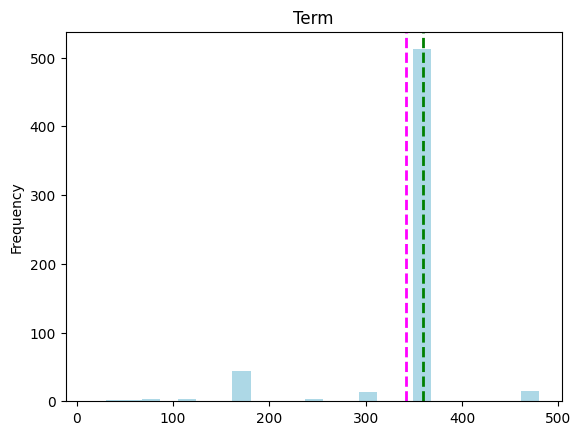

In [8]:
# Menampilkan data dengan plot
lw.plot.hist(title='Term', color='lightblue', bins=25)  
plt.axvline(lw.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(lw.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

In [9]:
#   melihat Mean dan median dari data
print('Mean' , lw.mean())
print('Median', lw.median())

Mean 342.0
Median 360.0


Dikarenakan distribusi data yang tidak normal ditandai dengan nilai mean dan median yang berjauhan serta bentuk plot yang sangat tidak normal(jika normal maka bentuk plot akan mirip dengan lonceng), maka saya akan mengimputasi missing value pada kolom Term menggunakan median nya


In [10]:
df['Term'].fillna(df['Term'].median(),inplace=True)

In [11]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

Saya akan menggabungkan Value dari 2 kolom yaitu Applicant Income dengan Coapplicant Income untuk efisiensi tabel

In [12]:
df['Coapplicant_Income'].value_counts()

Coapplicant_Income
0         273
250000      5
208300      5
166600      5
225000      3
         ... 
279100      1
101000      1
169500      1
259800      1
24000       1
Name: count, Length: 287, dtype: int64

In [13]:
df['income'] = df['Applicant_Income'] + df['Coapplicant_Income']
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status,income
0,Male,No,0,Graduate,No,584900,0,15000000,360,1,Urban,Y,584900
1,Male,Yes,1,Graduate,No,458300,150800,12800000,360,1,Rural,N,609100
2,Male,Yes,0,Graduate,Yes,300000,0,6600000,360,1,Urban,Y,300000
3,Male,Yes,0,Not Graduate,No,258300,235800,12000000,360,1,Urban,Y,494100
4,Male,No,0,Graduate,No,600000,0,14100000,360,1,Urban,Y,600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0,7100000,360,1,Rural,Y,290000
610,Male,Yes,3+,Graduate,No,410600,0,4000000,180,1,Rural,Y,410600
611,Male,Yes,1,Graduate,No,807200,24000,25300000,360,1,Urban,Y,831200
612,Male,Yes,2,Graduate,No,758300,0,18700000,360,1,Urban,Y,758300


In [14]:
df = df.drop(['Applicant_Income','Coapplicant_Income'], axis=1) # Menghapus kolom yang sudah tidak dipakai

In [15]:
df

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount,Term,Credit_History,Area,Status,income
0,Male,No,0,Graduate,No,15000000,360,1,Urban,Y,584900
1,Male,Yes,1,Graduate,No,12800000,360,1,Rural,N,609100
2,Male,Yes,0,Graduate,Yes,6600000,360,1,Urban,Y,300000
3,Male,Yes,0,Not Graduate,No,12000000,360,1,Urban,Y,494100
4,Male,No,0,Graduate,No,14100000,360,1,Urban,Y,600000
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7100000,360,1,Rural,Y,290000
610,Male,Yes,3+,Graduate,No,4000000,180,1,Rural,Y,410600
611,Male,Yes,1,Graduate,No,25300000,360,1,Urban,Y,831200
612,Male,Yes,2,Graduate,No,18700000,360,1,Urban,Y,758300


# Exproration Data

setelah itu saya ingin mengecek apakah ada outlier dari kolom Loan Amount


<Axes: xlabel='Loan_Amount', ylabel='Count'>

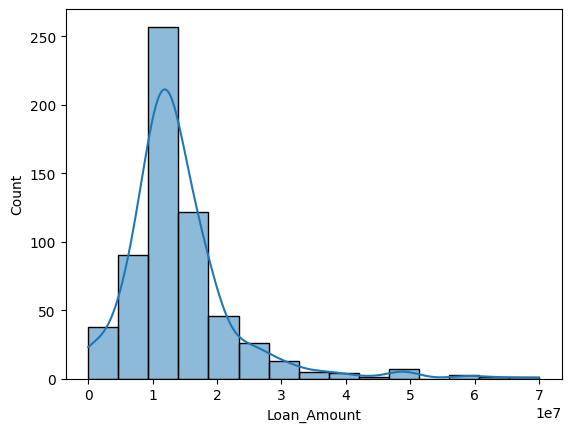

In [16]:
sns.histplot(df['Loan_Amount'],bins=15, kde=True)

dari hasil plotting sebenarnya cukup terlihat bahwa data memiliki skewness ditandai adanya ekor pada data yang memanjang di sebelah kanan( Distribusi data tidak normal )

In [17]:
q1 = df.Loan_Amount.quantile(0.25) #Kuartil ke-1 data
q3 = df.Loan_Amount.quantile(0.75) #Kuartil ke-3 data
IQR = q3 - q1
q1,q3,IQR

(9800000.0, 16475000.0, 6675000.0)

In [18]:
b_bawah = q1 - 3*IQR
b_atas = q3 + 3*IQR

outlier=df[(df.Loan_Amount < b_bawah) | (df.Loan_Amount > b_atas)] # filtering outlier
outlier # show outlier value

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount,Term,Credit_History,Area,Status,income
126,Male,Yes,3+,Graduate,No,37000000,360,1,Rural,Y,2e+06
130,Male,No,0,Graduate,Yes,65000000,480,1,Urban,Y,2e+06
155,Male,Yes,3+,Graduate,No,60000000,180,0,Semiurban,Y,4e+06
171,Male,Yes,3+,Graduate,No,70000000,300,1,Urban,Y,5e+06
177,Male,Yes,3+,Graduate,No,49500000,360,0,Semiurban,N,2e+06
278,Male,Yes,0,Graduate,No,43600000,360,1,Semiurban,Y,1e+06
308,Male,No,0,Graduate,No,48000000,360,1,Rural,N,2e+06
325,Male,Yes,1,Graduate,Yes,37600000,360,0,Rural,N,1e+06
333,Male,Yes,0,Graduate,No,49000000,180,1,Urban,Y,6e+06
369,Male,Yes,0,Graduate,No,57000000,360,1,Rural,N,2e+06


In [19]:
len(outlier) / len(df)

0.029315960912052116

terdapat outlier sebesar 2.9% pada data yang dimiliki, tetapi saya akan membiarkan saja karena menurut saya masi dalam batas wajar

selanjutnya saya ingin mengetahui apakah ada korelasi antara kolom loan amount dan juga kolom income
dengan:

hipotesis 0 : Loan Amount != Income
hipotesis 1 : Loan amount = Income

In [20]:
from scipy.stats import pearsonr

kor , p_val = pearsonr(df['Loan_Amount'],df['income'])

print('Korelasi = ',kor)
print('P Value = ',p_val)

Korelasi =  0.5961420804308862
P Value =  2.3856665828233866e-60


dari hasil pengujian hipotesis, kita dapat menolak hipotesis null dikarenakan nilai p value kurang dari 0,05 dimana berarti ada korelasi yang cukup tinggi dari kedua kolom tersebut

selanjutnya saya ingin melihat pola dari pinjaman yang diterima dan yang ditolak berdasarkan semua kolom yang ada

# Plotting
## Korelasi

<Axes: >

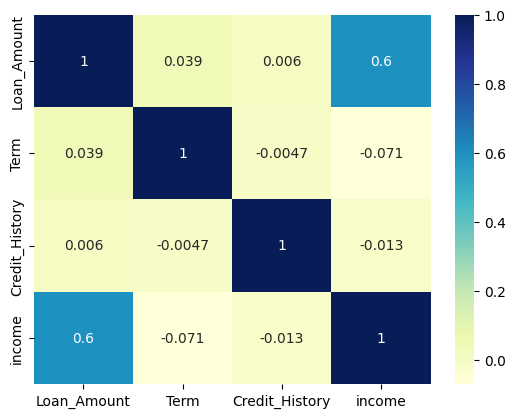

In [21]:
a = df.corr(numeric_only=True)
sns.heatmap(a,annot=True,cmap="YlGnBu")

sama seperti hasil yang telah didapat sebelumnya melalui hipotesis testing, kolom loan amount dan income merupakan kolom yang memiliki korelasi yang cukup besar

## Total

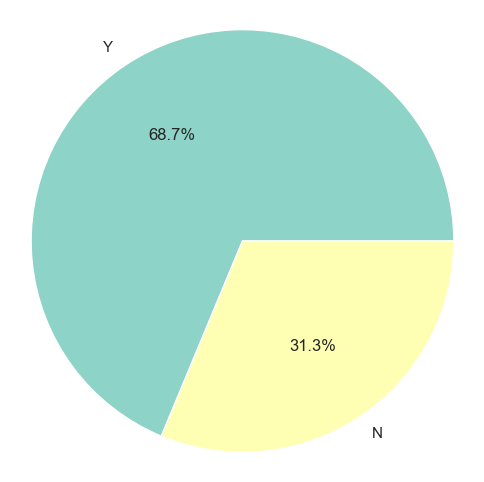

In [22]:
# Perbandingan Pinjaman di Terima / ditolak
counts = df['Status'].value_counts()
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.axis('equal')
plt.show()

## gender

<function matplotlib.pyplot.show(close=None, block=None)>

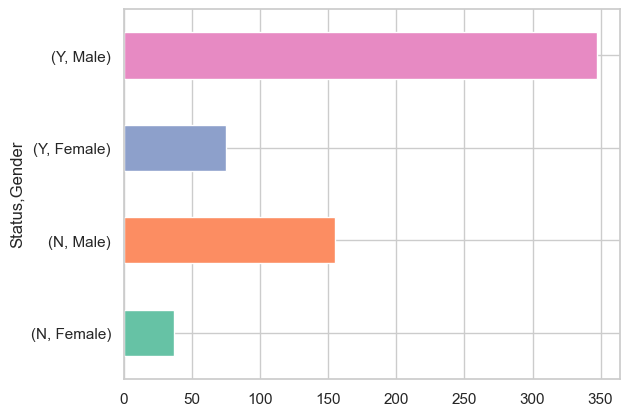

In [23]:
# menampilkan status penerimaan pinjaman berdasarkan gender
a = df.groupby(['Status','Gender'])['Gender'].count()
a.plot(kind='barh',color=sns.color_palette("Set2"))
plt.show

## Pernikahan

<function matplotlib.pyplot.show(close=None, block=None)>

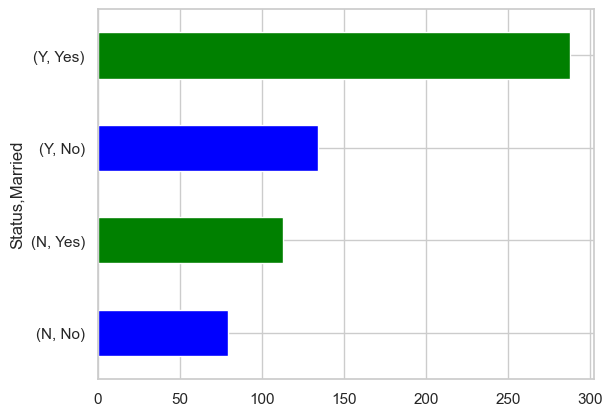

In [24]:
# menampilkan status penerimaan pinjaman berdasarkan Pernikahan
a = df.groupby(['Status','Married'])['Married'].count()
a.plot(kind='barh',color=('blue','green'))
plt.show

## Tanggungan

<function matplotlib.pyplot.show(close=None, block=None)>

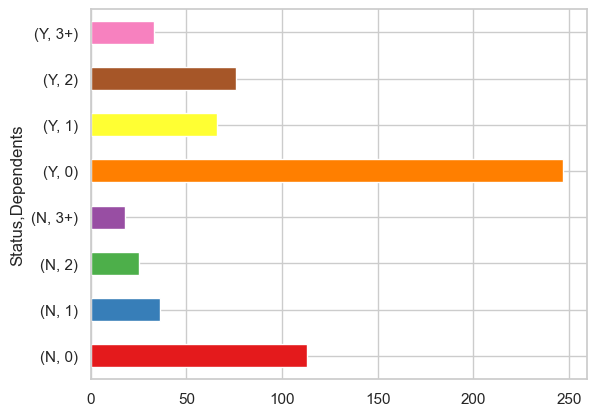

In [25]:
# menampilkan status penerimaan pinjaman berdasarkan Tanggungan
a = df.groupby(['Status','Dependents'])['Dependents'].count()
a.plot(kind='barh',color=sns.color_palette("Set1"))
plt.show

## Tingkat Pendidikan

<function matplotlib.pyplot.show(close=None, block=None)>

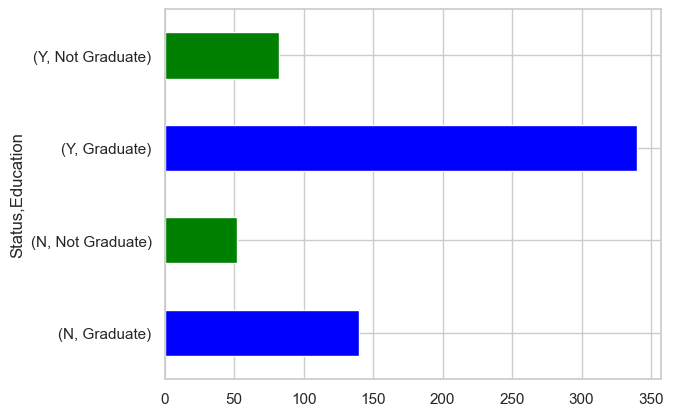

In [26]:
# menampilkan status penerimaan pinjaman berdasarkan Tingkat Pendidikan
a = df.groupby(['Status','Education'])['Education'].count()
a.plot(kind='barh',color=('blue','green'))
plt.show

In [63]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

## Pekerjaan

<function matplotlib.pyplot.show(close=None, block=None)>

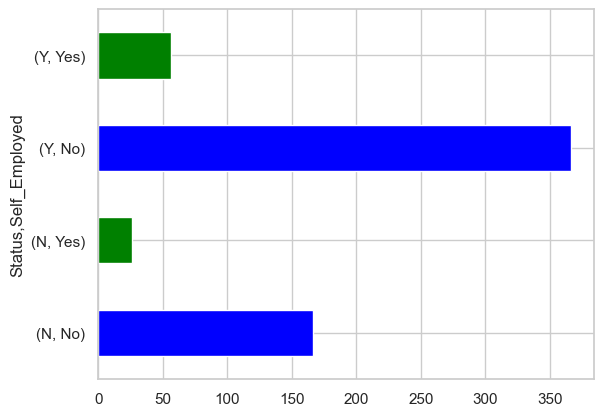

In [27]:
# menampilkan status penerimaan pinjaman berdasarkan Pekerjaan
a = df.groupby(['Status','Self_Employed'])['Self_Employed'].count()
a.plot(kind='barh',color=('blue','green'))
plt.show

## Jumlah Pinjaman

<function matplotlib.pyplot.show(close=None, block=None)>

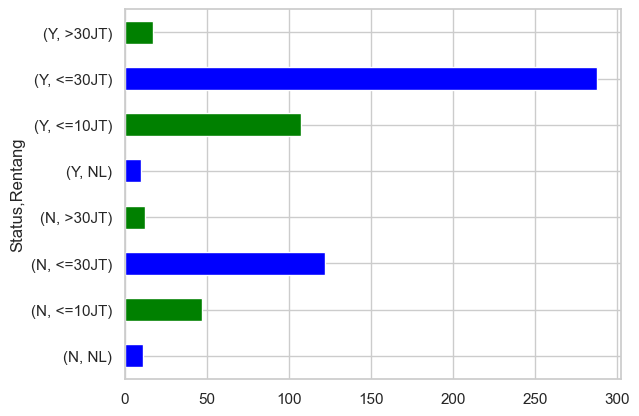

In [60]:
# menampilkan status penerimaan pinjaman berdasarkan Jumlah Pinjaman
bins = [-1,0, 10000000, 30000000, 1000000000000]
labels = ['NL','<=10JT', '<=30JT', '>30JT']
df['Rentang'] = pd.cut(df['Loan_Amount'], bins=bins, labels=labels)
a = df.groupby(['Status','Rentang'])['Rentang'].count()
a.plot(kind='barh',color=('blue','green'))
plt.show

Terdapat Value yang bernama NL. value tersebut saya buat dikarenakan pada dataset terdapat nilai 0 pada kolom Loan Amount. saya menyimpulkan bahwa itu merupakan Keisengan para pengaju pinjaman. mengapa ada yang diterima dan ada yang tidak? untuk kolom diterima, walaupun perusahaan menerima permintaan hutang dari pengaju pinjaman tetapi tidak ada nilai uang yang dikeluarkan perusahaan. sedangkan untuk kolom ditolak, meskipun kolom jumlah pinjaman dikosongkan, perusahaan juga menilai berbagai kriteria sehingga memutuskan untuk menolak

In [62]:
df['Rentang'].value_counts()

Rentang
<=30JT    410
<=10JT    154
>30JT      29
NL         21
Name: count, dtype: int64

## Jangka Waktu Pinjaman

<function matplotlib.pyplot.show(close=None, block=None)>

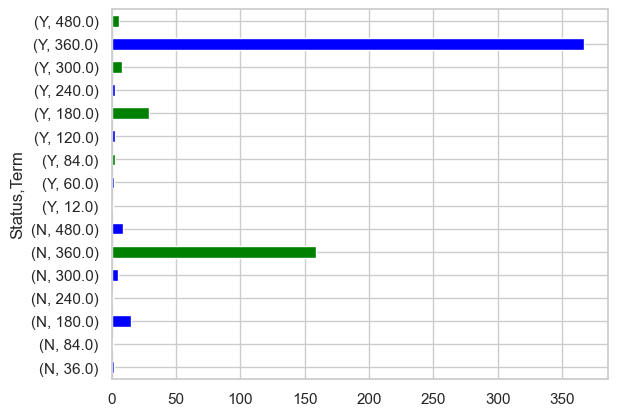

In [29]:
# menampilkan status penerimaan pinjaman berdasarkan Jangka Waktu Pinjaman
a = df.groupby(['Status','Term'])['Term'].count()
a.plot(kind='barh',color=('blue','green'))
plt.show

## Pembayaran Kredit

<function matplotlib.pyplot.show(close=None, block=None)>

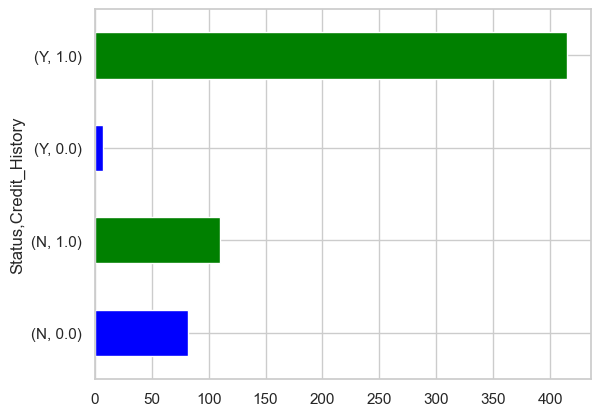

In [30]:
# menampilkan status penerimaan pinjaman berdasarkan Pembayaran Kredit
a = df.groupby(['Status','Credit_History'])['Credit_History'].count()
a.plot(kind='barh',color=('blue','green'))
plt.show

## Tempat Tinggal

<function matplotlib.pyplot.show(close=None, block=None)>

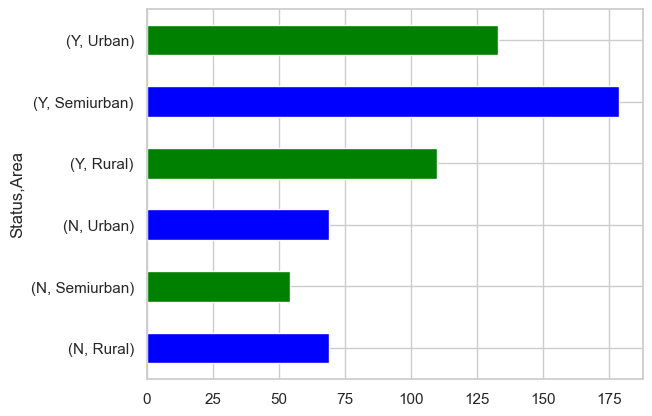

In [31]:
# menampilkan status penerimaan pinjaman berdasarkan Tempat Tinggal
a = df.groupby(['Status','Area'])['Area'].count()
a.plot(kind='barh',color=('blue','green'))
plt.show

## Pendapatan

<function matplotlib.pyplot.show(close=None, block=None)>

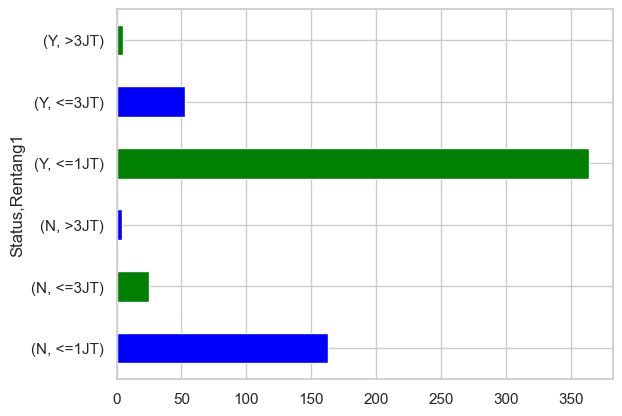

In [50]:
# menampilkan status penerimaan pinjaman berdasarkan Pendapatan
bins = [0, 1000000, 3000000, 10000000]
labels = ['<=1JT', '<=3JT', '>3JT']
df['Rentang1'] = pd.cut(df['income'], bins=bins, labels=labels)
a = df.groupby(['Status','Rentang1'])['Rentang1'].count()
a.plot(kind='barh',color=('blue','green'))
plt.show

In [33]:
df.to_csv('m1.csv',index=False)

Untuk pemfilteran lebih lanjut dapat dilihat di Dashboard yang telah saya buat

# Summary
    Berdasarkan data yang dimiliki, terdapat 68% Loan Applicator yang diterima, dengan kemungkinan terbesar mendapatkan pinjaman yaitu Laki-laki yang sudah menikah dan tinggal di daerah sub urban ,tidak memiliki tanggungan, tidak bekerja sebagai wiraswasta, Lulus dari segi pendidikan, serta history pembayaran kredit nya bagus. untuk jumlah pinjaman dapat diterima berdasarkan penghasilan dari applicant. semakin besar penghasilan nya, maka semakin besar juga uang yang dapat dipinjam. term yang paling umum di pakai adalah selama 360 hari

    sedangkan kemungkinan terkecil seorang applicant mendapatkan pinjaman ialah berdasarkan kredit History nya yang buruk